<a href="https://colab.research.google.com/github/fcignoli/Redes-Complejas-2-20222/blob/main/TPC02_Distribuciones_de_grado_y_Asortatividad_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Asortatividad

In [ ]:
# Libreria para ajustar una power-law
!pip install plfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import plfit
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from tqdm import tqdm
url = "http://materias.df.uba.ar/rca2022c2/files/2022/09/netscience.zip"
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
       archivos = zfile.namelist()
       for archivo in tqdm(archivos):
           if archivo.endswith('.gml'):
               zfile.extract(archivo, '/content')
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
       archivos = zfile.namelist()
       for archivo in tqdm(archivos):
           if archivo.endswith('.txt'):
               zfile.extract(archivo, '/content')
print('archivos cargados')

100%|██████████| 4/4 [00:00<00:00, 375.13it/s]

archivos cargados


In [ ]:
str.split?

In [ ]:
def abrir_txt(nombre_archivo, sep = None):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split(sep)
        data.append(columna)    
    return data

a) Considere la red de colaboraciones científicas (netscience.gml) y la red de internet (as-july06.gml). Analice si nodos de alto grado tienden a conectarse con nodos de alto grado o, por el contrario, suelen conectarse a nodos de bajo grado (i.e la red es asortativa o disortativa respecto al grado).

In [ ]:
Data_Internet = abrir_txt('/content/as-22july06_edgelist.txt')
Data_Internet=[[col1,col2] for (col1,col2,col3) in Data_Internet]
net_Colaboraciones = nx.read_gml('/content/netscience.gml')

# armo la red de internet
net_Internet = nx.Graph()
net_Internet.add_edges_from(Data_Internet)

In [ ]:
def hacer_lista_grados(Net):
  lista_grados=[grado for (nodo,grado) in Net.degree()]
  return lista_grados


In [ ]:
grado_nodos_internet = dict(net_Internet.degree()) #grado de los nodos
grado_medio_internet = nx.average_neighbor_degree(net_Internet) #grado medio de los vecinos de cada nodo
print(grado_nodos_internet)
print(grado_medio_internet)

{'8001': 223, '64666': 1, '7018': 2016, '1299': 423, '4513': 523, '5650': 204, '3292': 303, '6939': 529, '12956': 146, '6395': 424, '286': 288, '6539': 284, '6461': 697, '6079': 142, '293': 116, '8075': 212, '3303': 590, '4637': 229, '19029': 169, '2497': 206, '3602': 90, '812': 52, '3561': 532, '2516': 286, '4323': 755, '1273': 276, '174': 1243, '5459': 209, '6320': 178, '3491': 362, '10310': 48, '22822': 77, '25973': 57, '19151': 62, '20473': 10, '7132': 658, '19548': 28, '6128': 132, '22773': 125, '6389': 34, '8342': 268, '4181': 43, '1784': 49, '7784': 26, '4436': 65, '4565': 68, '6830': 36, '22420': 2, '13768': 90, '14989': 11, '2686': 105, '5400': 207, '15290': 110, '8220': 425, '6327': 104, '5769': 27, '19752': 29, '6762': 107, '2529': 36, '22867': 10, '8121': 25, '19835': 6, '11368': 2, '33334': 2, '12222': 30, '23393': 24, '11867': 30, '3786': 278, '9680': 20, '5466': 20, '8928': 240, '3741': 52, '8210': 32, '15412': 93, '13237': 150, '6774': 25, '3300': 77, '9132': 65, '6805'

In [ ]:
#Armo un dataframe correspondiente a la red de Internet.
import pandas as pd
df1 = pd.DataFrame(grado_nodos_internet.items(),columns=['nodo','k']) 
df2 = pd.DataFrame(grado_medio_internet.items(),columns=['nodo','<k>'])
df_internet = pd.concat([df1,df2['<k>']],axis=1)
df_internet

,nodo,k,<k>
0,8001,223,82.793722
1,64666,1,223.000000
2,7018,2016,12.483631
3,1299,423,65.023641
4,4513,523,50.495220
...,...,...,...
22936,18005,1,3.000000
22937,4738,1,2.000000
22938,24174,1,4.000000
22939,24124,1,3.000000


Calculamos el valor $k_{nn}$ que es el grado medio de primeros
vecinos de nodos con grado k (primero para la red de internet y despues para la red de colaboraciones) para posteriormente analizar la tendencia observada en un gráfico $k_{nn}(k)$, además realizamos un ajuste en la escala logarítmica para ver la asortatividad.

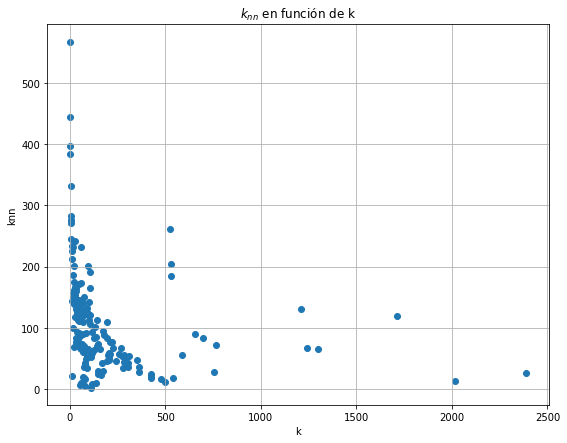

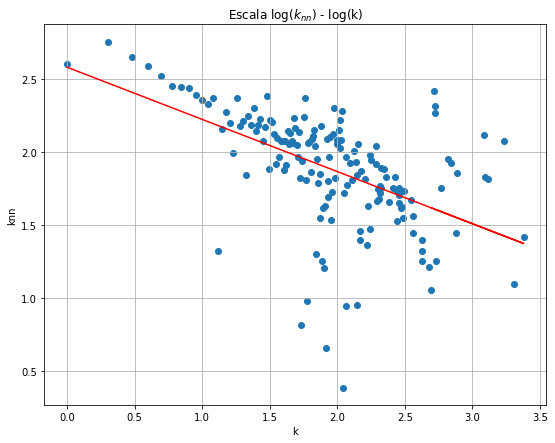

2.5784121355009857 -0.3567531057454973
exponente de correlación =-0.3567531057454973


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in power


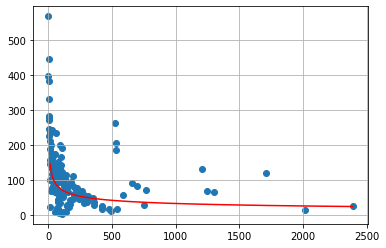

In [ ]:
from pandas.core.arrays.sparse import array
#df_internet.drop('nodo',inplace=True,axis=1)
from sklearn.linear_model import LinearRegression
k_nn = df_internet.groupby(['k'])['<k>'].mean().to_list() #agrupo los grados de los nodos con groupby y calculo el promedio de <k> con .mean
k = [*set(df_internet['k'].to_list())] #lista con el grado de los nodos

#grafico los puntos de las listas k_nn en función de k
plt.figure(figsize=(9,7)) 
plt.scatter(k,k_nn)
plt.xlabel('k')
plt.ylabel('knn')
plt.title("$k_{nn}$ en función de k")
plt.grid(True)
plt.show()

b, a = np.polyfit(np.log10(k), np.log10(k_nn), deg=1) #hago un ajuste lineal de log-log y obtengo los parámetros a , b
xseq = np.linspace(0, max(k), 161) 

plt.figure(figsize=(9,7)) 
plt.scatter(np.log10(k), np.log10(k_nn)) 
#plt.xscale('log');plt.yscale('log')
plt.plot(np.log10(k), a + b *np.array(np.log10(k)), color="red", lw=1.5); #grafico el fiteo
plt.xlabel('k')
plt.ylabel('knn')
plt.title("Escala log($k_{nn}$) - log(k)")
plt.grid(True)
plt.show()
print(a,b) # De estos parámetros obtenemos el exponente de correlación
print('exponente de correlación ='+ str(b))

plt.scatter(k,k_nn)
plt.plot(xseq,10**a*xseq**b,color="red")
plt.grid(True)
plt.show()

Como se puede observar para el gráfico de $k_{nn}(k)$ correspondiente a la red de internet tiene una forma exponencial decreciente. Además analizando el gráfico en escala logarítmica se puede observar que se trata de una red disasortativa.

In [ ]:
#Armo el dataframe con la informacion de la red de Colaboraciones
list(net_Colaboraciones.nodes)
grado_nodos_colaboraciones = dict(net_Colaboraciones.degree()) #grado de los nodos
grado_medio_colaboraciones = nx.average_neighbor_degree(net_Colaboraciones) #grado medio de los vecinos

df1 = pd.DataFrame(grado_nodos_colaboraciones.items(),columns=['nodo','k'])
df2 = pd.DataFrame(grado_medio_colaboraciones.items(),columns=['nodo','<k>'])
df_colaboraciones = pd.concat([df1,df2['<k>']],axis=1)
df_colaboraciones

,nodo,k,<k>
0,"ABRAMSON, G",2,2.500000
1,"KUPERMAN, M",3,1.666667
2,"ACEBRON, J",4,4.000000
3,"BONILLA, L",4,4.000000
4,"PEREZVICENTE, C",4,4.000000
...,...,...,...
1584,"MONDRAGON, R",1,1.000000
1585,"ZHU, H",2,1.000000
1586,"HUANG, Z",1,2.000000
1587,"ZHU, J",1,2.000000


Hacemos el mismo análisis de $k_{nn}(k)$ para la red de colaboraciones:

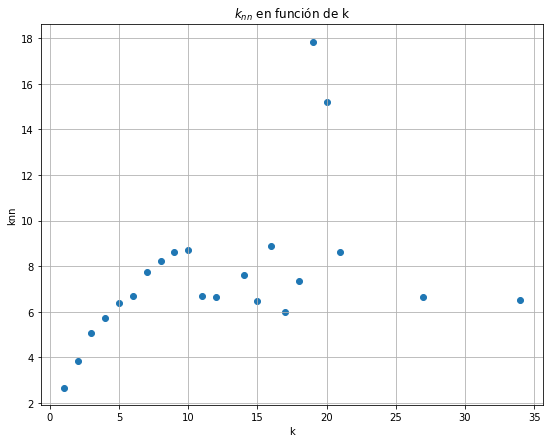

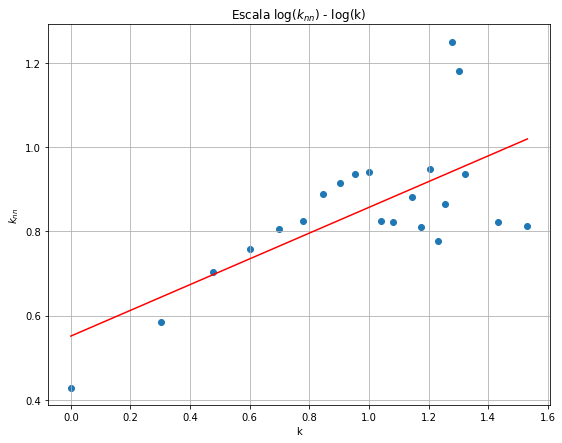

0.5510623977508013 0.3061166510037071
exponente de correlación =0.3061166510037071


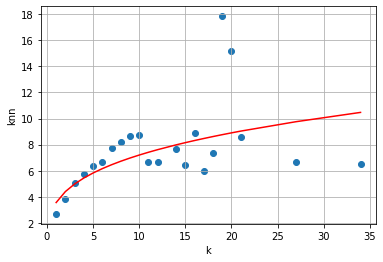

In [ ]:
k_nn = df_colaboraciones.groupby(['k'])['<k>'].mean().to_list() #lista con el promedio de los grados medios de los vecinos para los nodos de la red de Colaboraciones.
k = [*set(df_colaboraciones['k'].to_list())] #lista con el grado de los nodos de la red de Colaboraciones
k.remove(0);k_nn.remove(0)
#grafico los puntos de las listas k_nn en función de k
plt.figure(figsize=(9,7)) 
plt.scatter(k,k_nn)
plt.xlabel('k')
plt.ylabel('knn')
plt.title("$k_{nn}$ en función de k")
plt.grid(True)
plt.show()

b, a = np.polyfit(np.log10(k), np.log10(k_nn), deg=1) #hago un ajuste lineal de log-log y obtengo los parámetros a , b
xseq = np.linspace(0, max(k), len(k)) 

plt.figure(figsize=(9,7)) 
plt.scatter(np.log10(k), np.log10(k_nn)) 
#plt.xscale('log');plt.yscale('log')
plt.plot(np.log10(k), a + b *np.array(np.log10(k)), color="red", lw=1.5); #grafico el fiteo
plt.xlabel('k')
plt.ylabel('$k_{nn}$')
plt.title("Escala log($k_{nn}$) - log(k)")
plt.grid(True)
plt.show()
print(a,b) # De estos parámetros obtenemos el exponente de correlación
print('exponente de correlación ='+ str(b))

plt.scatter(k,k_nn)
plt.xlabel('k')
plt.ylabel('knn')
plt.plot(k,10**a*k**b,color="red")
plt.grid(True)
plt.show()


En el gráfico $k_{nn}(k)$ de la red de colaboraciones no podemos marcar ninguna tendencia a priori, esto puede deberse a que tanta variedad de grados en los nodos de la red. Y cuando lo analizamos en escala logarítmica el ajuste nos marca una tendencia asortativa.

Calculo los valores de $S_1, S_2, S_3$ y $S_e$ vistos en clase, para posteriormente calcular la asortatividad con el modelo de Newmann:

In [ ]:

def Newman_model(L,red):
  S_1 = sum(L)
  s_2 = [n**2 for n in L]
  S_2 = sum(s_2)
  s_3 = [n**3 for n in L]
  S_3 = sum(s_3)
  k_ixk_j = []
  for enlace in red.edges():
    k_i = red.degree(enlace[0])
    k_j = red.degree(enlace[1])
    k_ixk_j.append(k_i*k_j)
  S_e = 2*sum(k_ixk_j)
  return((S_1*S_e-S_2**2)/(S_1*S_3-S_2**2))


In [ ]:
L1 = df_internet['k'].to_list() # lista con los grados de los nodos de la red de Internet

Newman_model(L1,net_Internet)

-0.19873552194552238

In [ ]:
L2 = df_colaboraciones['k'].to_list() # lista con los grados de los nodos de la red de Colaboraciones

Newman_model(L2,net_Colaboraciones)

0.4616224667525835

El exponente de correlación obtenido en los ajustes tiene la forma funcional $k_{nn}(k)= ak^{\mu}$ donde $\mu$ es el exponente de correlacion para analizar la asotatividad a través de una medida de covarianza, en cambio el coeficiente obtenido en el modelo de Newman tiene la forma funcional $k_{nn}(k)\sim r k$ donde $-1<r<1$ es una medida de covarianza normalizada en donde, en caso de obtener una asortativida máxima se obtendria un 1. Dicho esto y observando los coeficiente de Newman obtenemos nuevamente que la red de internet es disasortativa y la red de colaboraciones asortativa.

b) Corra el script de cálculo (puntos i-iii) para las redes Y2H y AP-MS. ¿Puede explicar lo que observa en cuanto a la asortatividad reportada?

In [ ]:
#Repitamos el script de calculo para las redes Y2H y AP-MS.

Data_Y2H = abrir_txt('/content/yeast_Y2H.txt')
Data_AP_MS = abrir_txt('/content/yeast_AP-MS.txt')
Red_Y2H=nx.Graph()
Red_Y2H.add_edges_from(Data_Y2H)
Red_AP_MS=nx.Graph()
Red_AP_MS.add_edges_from(Data_AP_MS)

Analisis y ajuste correspondiente a la red Y2H:

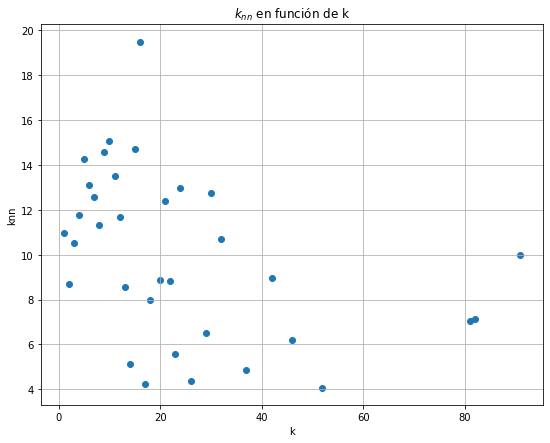

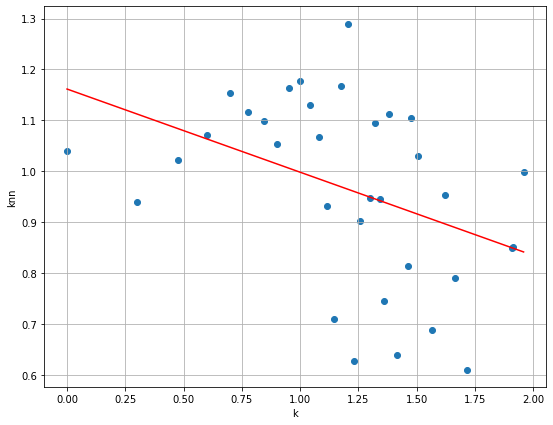

1.1614251530967603 -0.1633936068074014
k_max = 91


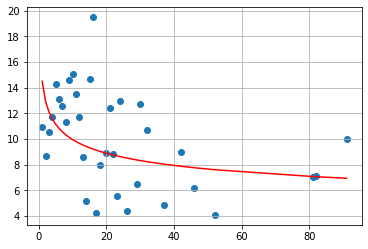

In [ ]:
#Y2H
grado_nodos_y2h = dict(Red_Y2H.degree()) 
grado_medio_y2h = nx.average_neighbor_degree(Red_Y2H)
df1 = pd.DataFrame(grado_nodos_y2h.items(),columns=['nodo','k']) 
df2 = pd.DataFrame(grado_medio_y2h.items(),columns=['nodo','<k>'])
df_y2h = pd.concat([df1,df2['<k>']],axis=1)

k_nn = df_y2h.groupby(['k'])['<k>'].mean().to_list() #agrupo los grados de los nodos con groupby y calculo el promedio de <k> con .mean
k = [*set(df_y2h['k'].to_list())] #lista con el grado de los nodos

#grafico los puntos de las listas k_nn en función de k
plt.figure(figsize=(9,7)) 
plt.scatter(k,k_nn)
plt.xlabel('k');plt.ylabel('knn')
plt.title("$k_{nn}$ en función de k")
plt.grid(True)
plt.show()

b, a = np.polyfit(np.log10(k), np.log10(k_nn), deg=1) #hago un ajuste lineal de log-log y obtengo los parámetros a , b

plt.figure(figsize=(9,7)) 
plt.scatter(np.log10(k), np.log10(k_nn)) 
plt.plot(np.log10(k), a + b * np.log10(k), color="red", lw=1.5); #grafico el fiteo
plt.xlabel('k')
plt.ylabel('knn')
plt.grid(True)
plt.show()
print(a,b) # De estos parámetros obtenemos el exponente de correlación

print('k_max =', max(k))
plt.scatter(k,k_nn)
plt.plot(k,10**a*k**b,color="red")
plt.grid(True)
plt.show()


Observando el gráfico $k_{nn}(k)$ de la red Y2H no tiene una forma funcional marcada, de igual manera puede deberse a que la red no tiene variación de grados y el tamaño de la red. Respecto al ajuste en la escala logarítmica tampoco se puede observar un ajuste aceptable por la dispersión de los datos en la escala.

Análisis y ajuste correspondiente a la red AP-MS:

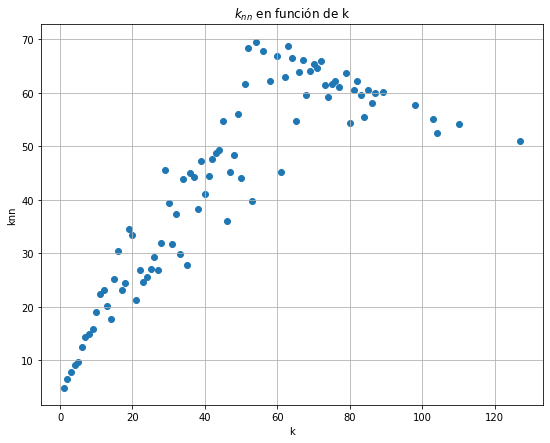

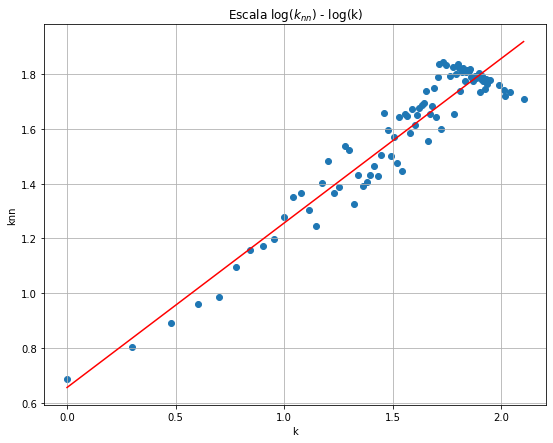

0.6569082376633391 0.5992892362980189


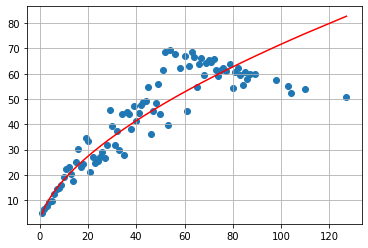

In [ ]:

grado_nodos_apms = dict(Red_AP_MS.degree()) 
grado_medio_apms = nx.average_neighbor_degree(Red_AP_MS)
df1 = pd.DataFrame(grado_nodos_apms.items(),columns=['nodo','k']) 
df2 = pd.DataFrame(grado_medio_apms.items(),columns=['nodo','<k>'])
df_apms = pd.concat([df1,df2['<k>']],axis=1)

k_nn = df_apms.groupby(['k'])['<k>'].mean().to_list() #agrupo los grados de los nodos con groupby y calculo el promedio de <k> con .mean
k = [*set(df_apms['k'].to_list())] #lista con el grado de los nodos

#grafico los puntos de las listas k_nn en función de k
plt.figure(figsize=(9,7)) 
plt.scatter(k,k_nn)
plt.xlabel('k');plt.ylabel('knn')
plt.title("$k_{nn}$ en función de k")
plt.grid(True)
plt.show()

b, a = np.polyfit(np.log10(k), np.log10(k_nn), deg=1) #hago un ajuste lineal de log-log y obtengo los parámetros a , b

plt.figure(figsize=(9,7)) 
plt.scatter(np.log10(k), np.log10(k_nn)) # Graficamos en log-log
plt.plot(np.log10(k), a + b * np.log10(k), color="red", lw=1.5); #grafico el fiteo
plt.xlabel('k');plt.ylabel('knn')
plt.title("Escala log($k_{nn}$) - log(k)")
plt.grid(True)
plt.show()
print(a,b) # De estos parámetros obtenemos el exponente de correlación

plt.scatter(k,k_nn)
plt.plot(k,10**a*k**b,color="red")
plt.grid(True)
plt.show()

Se puede observar en el gráfico $k_{nn}(k)$ una tendencia lineal y creciente de los puntos, y ajustando en la escala logarítmica se puede ver que indica una red asortativa.